### Credit Card Customer Data - Clustering with Kmeans
   

#### Context
A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

A few tasks that can be performed using this dataset is as follows:

- Perform Data-Cleaning,Preprocessing,Visualizing and Feature Engineering on the Dataset.
- Implement K-Means Clustering model.

#### Content

The Attributes Include:

- Sl_No
- Customer Key
- AvgCreditLimit
- TotalCreditCards
- Totalvisitsbank
- Totalvisitsonline
- Totalcallsmade

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [4]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\sbnt\Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.shape

(660, 7)

In [6]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Data Preprocess

In [8]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [10]:
dfc = df.drop(['Sl_No', 'Customer Key'], axis=1).copy()

In [11]:
dfc.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

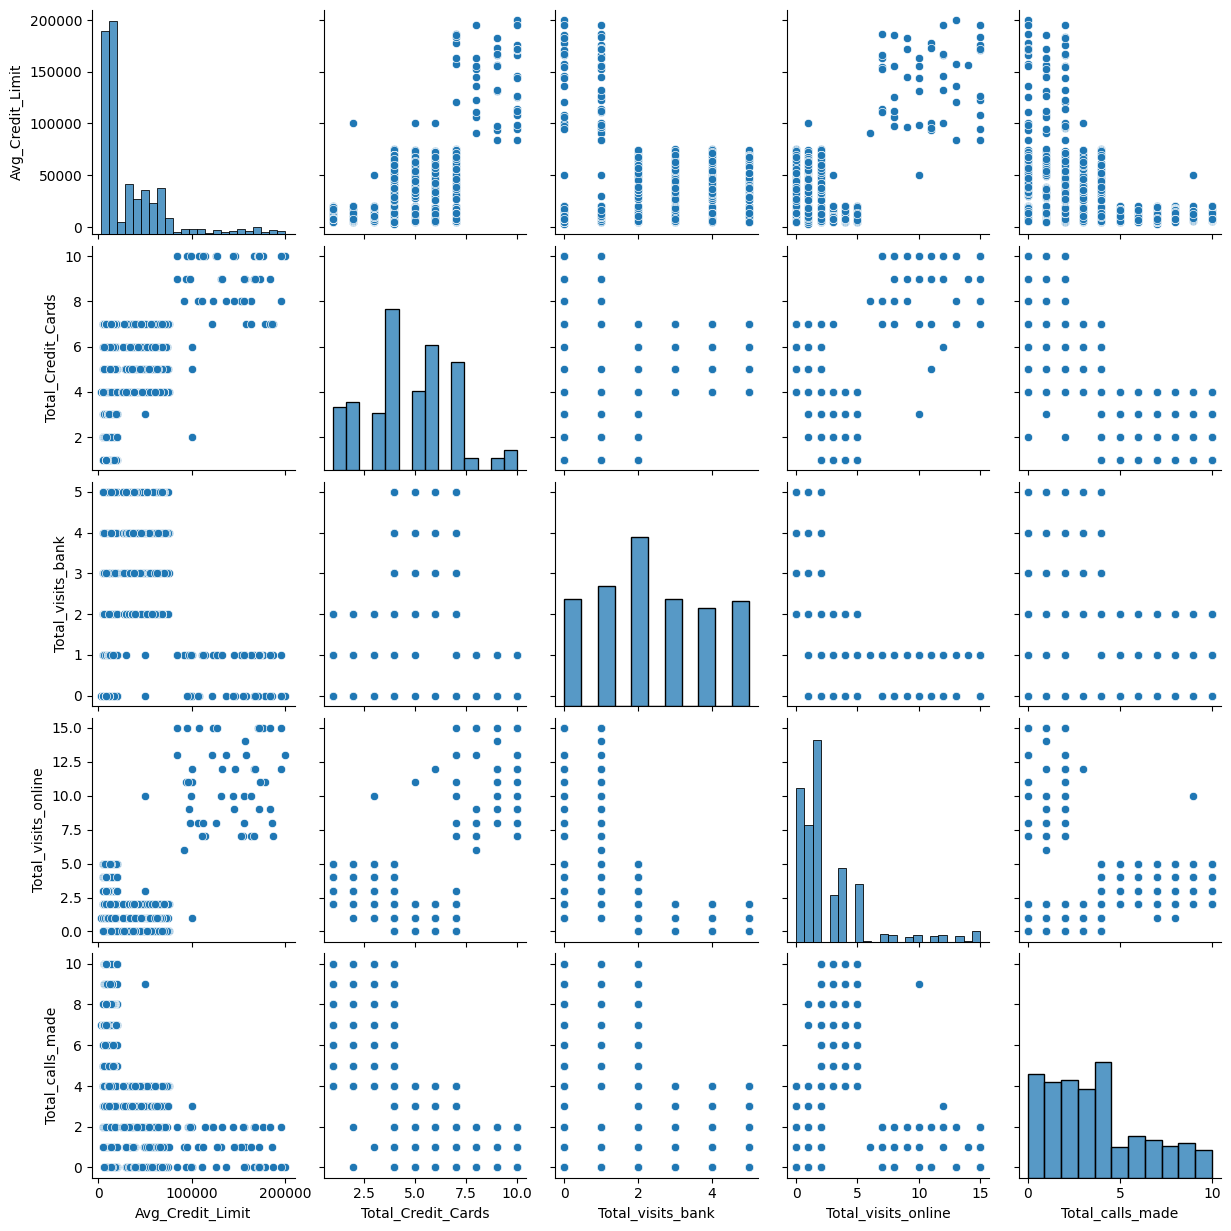

In [12]:
sns.pairplot(dfc)

In [13]:
dfc.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

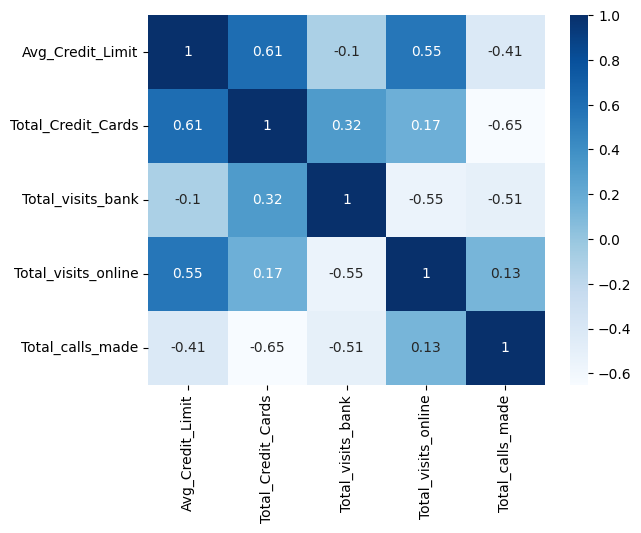

In [15]:
sns.heatmap(dfc.corr(), annot=True, cmap="Blues")

#### Feature Selection

In [16]:
x = dfc
x
#average credit limit and total credit cards

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [16]:
#x = dfc.iloc[:,[0,1]]
#x


normalize the data so that the data does not have large deviations

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

#### Elbow method 
To determine the optimal number of K

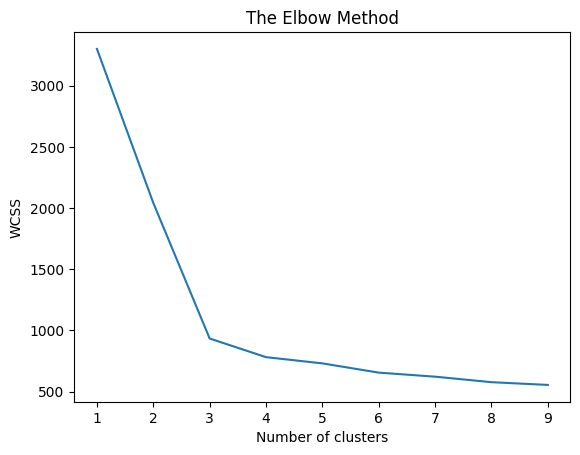

In [18]:
from sklearn.cluster import KMeans
wcss=[]

# assume the number of K is between 1 and 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters obtained from the elbow method is 3

In [19]:
from sklearn.cluster import KMeans

# determine the number of clusters
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(x)

# get cluster labels
labels = kmeans.predict(x)

# get centroid value
centroids = kmeans.cluster_centers_

In [20]:
centroids

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [22]:
##no need -: is for deleting
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load the data
#data = pd.read_csv('credit_card_data.csv')

# Drop the columns that are not features
features = df.drop(['Sl_No', 'Customer Key'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Save the model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'preprocessork.pkl')


['preprocessork.pkl']

In [21]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)
y_kmeans 

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
# number of members of each cluster
pred = y_kmeans
dfc['Cluster'] = pred
dfc['Cluster'].value_counts()

Cluster
0    386
1    224
2     50
Name: count, dtype: int64

#### Silhouette Score

The silhouette_score function from sklearn.metrics.cluster is used to evaluate the quality of clustering. It measures how similar each sample is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher score indicates better-defined clusters.

In [23]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(x, labels)


0.5157182558881063

In [ ]:
fix,ax = plt.pyplot(figsize=(12, 6))
plt.scatter(x[pred == 1 , 0],x[pred == 0 ,1])

#### Visualization

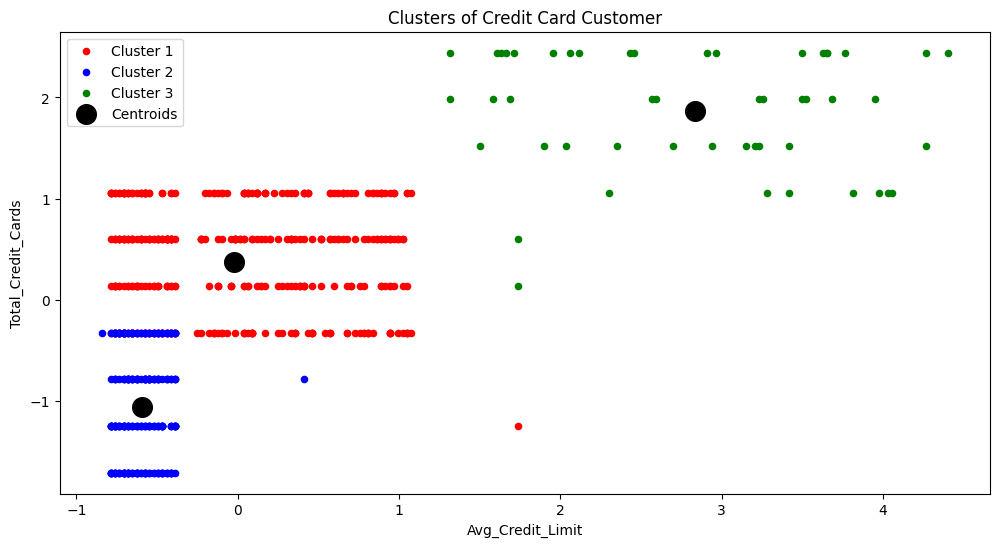

In [24]:
#Visualizing all the clusters 
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of Credit Card Customer')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.show()

Cluster 1 (Red) = customers who have total credit and a medium average limit

Cluster 2 (Blue) = customers who have the lowest total credit and average limit

Cluster 3 (Green) = customers who have the highest total credit cards and average limits